<a href="https://colab.research.google.com/github/Augustogrecco/Cursocoderhouse/blob/main/Proyecto_Coder_DS_Grecco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En este proyecto, se analizarán datos meteorológicos de varias ciudades diferentes de Australia con el objetivo de predecir la lluvia y su impacto en la planificación de eventos al aire libre. La empresa "Outdoor Events Pty Ltd" es una organizadora de eventos con sede en varias cuidades, que se dedica a la planificación y ejecución de una amplia variedad de eventos al aire libre, como conciertos, festivales, bodas y eventos corporativos.

Para "Outdoor Events Pty Ltd", la precisión en la predicción del clima es de vital importancia, ya que incide directamente en la logística y el éxito de sus eventos. La decisión de si lloverá o no al día siguiente puede afectar la planificación de múltiples aspectos del evento, como la disposición de las instalaciones, la programación de actividades al aire libre, la seguridad de los asistentes y la gestión de los recursos.

Por lo tanto, el objetivo principal de este proyecto es no solo proporcionar una herramienta precisa de predicción de lluvia, sino también explorar el potencial innovador que puede surgir al integrar la meteorología como parte integral de la planificación de eventos al aire libre.

 Descripción de las variables meteorológicas disponibles en el set de datos.

Diccionario de variables:

Date: La fecha en la que se registraron los datos.

Location: La ubicación geográfica donde se recopilaron los datos meteorológicos.

MinTemp: La temperatura mínima registrada durante el día en grados Celsius.

MaxTemp: La temperatura máxima registrada durante el día en grados Celsius.

Rainfall: La cantidad de lluvia registrada en milímetros.

Evaporation: La tasa de evaporación medida en milímetros por día.

Sunshine: El número de horas de sol registradas durante el día. 8. WindGustDir: La dirección de la ráfaga de viento más fuerte.

WindGustSpeed: La velocidad máxima del viento en kilómetros por hora. 10. WindDir9am: La dirección del viento a las 9:00 AM.

WindDir3pm: La dirección del viento a las 3:00 PM.

WindSpeed9am: La velocidad del viento a las 9:00 AM en kilómetros por hora.

WindSpeed3pm: La velocidad del viento a las 3:00 PM en kilómetros por hora.

Humidity9am: La humedad relativa a las 9:00 AM en porcentaje.

Humidity3pm: La humedad relativa a las 3:00 PM en porcentaje.

Pressure9am: La presión atmosférica a las 9:00 AM en hectopascales.

Pressure3pm: La presión atmosférica a las 3:00 PM en hectopascales.

Cloud9am: La cantidad de nubosidad a las 9:00 AM en octavos.

Cloud3pm: La cantidad de nubosidad a las 3:00 PM en octavos. 20. Temp9am: La temperatura a las 9:00 AM en grados Celsius.

Temp3pm: La temperatura a las 3:00 PM en grados Celsius.

RainToday: Variable binaria que indica si llovió ese día (Sí/No).

RainTomorrow: Variable binaria que indica si lloverá al día siguiente (Sí/No).

Análisis Exploratorio de Datos (EDA)

• Cargar los datos meteorológicos de varias ciudades de Australia desde Github.

In [ ]:
import pandas as pd
import numpy as np

# URL del conjunto de datos en GitHub
url = 'https://raw.githubusercontent.com/Augustogrecco/Cursocoderhouse/main/weatherAUS.csv'

# Leer el conjunto de datos desde la URL
data = pd.read_csv(url, delimiter=',')

data.info()
# Contar los valores perdidos en cada columna
print("\nValores perdidos en cada columna:")
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

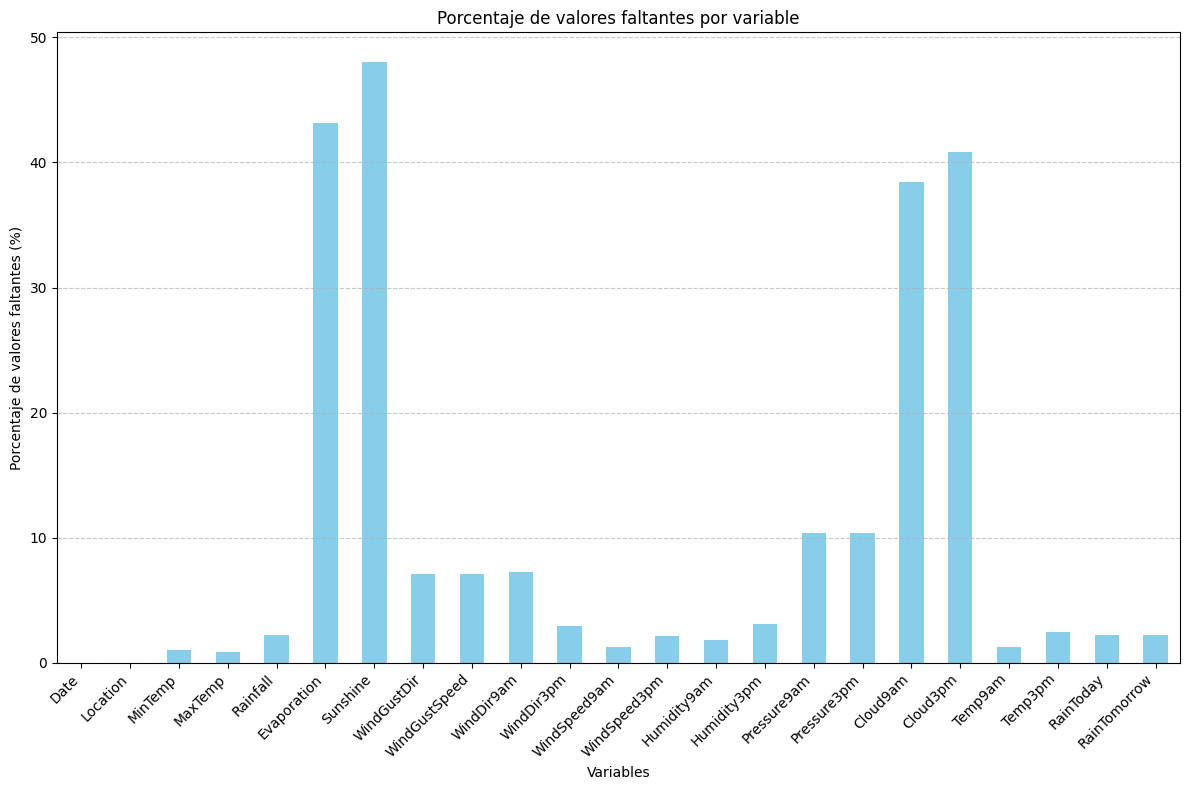

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64


In [ ]:
import matplotlib.pyplot as plt

# Calcular el porcentaje de valores faltantes por columna
missing_percentage = (data.isnull().sum() / len(data)) * 100

# Crear un gráfico de barras
plt.figure(figsize=(12, 8))
missing_percentage.plot(kind='bar', color='skyblue')
plt.title('Porcentaje de valores faltantes por variable')
plt.xlabel('Variables')
plt.ylabel('Porcentaje de valores faltantes (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

print(data.isnull().sum())


En base a este primer análisis, vamos a hacer algunos ajustes, para modelar los datos y poder continuar trabajando.

In [ ]:
import numpy as np
from scipy.stats import mode

# Paso 1: Convertir la columna 'Date' a tipo datetime
data['Date'] = pd.to_datetime(data['Date'])


# Paso 2: Extraer el mes del año y crear una nueva columna para almacenarlo
data['Month'] = data['Date'].dt.month

# Paso 3: Calcular la media de la temperatura mínima y máxima para cada ubicación y mes
monthly_means = data.groupby(['Location', 'Month'])[['MinTemp', 'MaxTemp']].mean()

# Paso 4: Imputar los valores faltantes de la temperatura mínima y máxima utilizando la media correspondiente a cada ubicación y mes
for index, row in data.iterrows():
    location = row['Location']
    month = row['Date'].month
    if pd.isna(row['MinTemp']):
        location_month_mean = monthly_means.loc[(location, month)]['MinTemp']
        data.at[index, 'MinTemp'] = location_month_mean
    if pd.isna(row['MaxTemp']):
        location_month_mean = monthly_means.loc[(location, month)]['MaxTemp']
        data.at[index, 'MaxTemp'] = location_month_mean
# Ahora df contendrá los valores faltantes de MinTemp y MaxTemp imputados con la media de cada ubicación y mes
# Paso 5 Eliminar las columnas del DataFrame ya que tienen muchos valores faltantes, y no serán relevantes en el análisis.

columns_to_drop = ['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm',]

data = data.drop(columns=columns_to_drop)

# Paso 6 Como tenemos pocos días para entregar este trabajo, se define usar la estrategia de reemplazar los valores faltantes de Rainfall con cero, aunque podríamos como recomendación a futuro, buscar por ejemplo la lluvia de lugares cercanos y armar un modelo de ML para competar estos valores faltantes con modelos de proximidad para esas fechas.

# Reemplazar los valores faltantes de Rainfall con cero
data['Rainfall'].fillna(0, inplace=True)

# Otra definición importante tomando en cuenta el tiempo de trabajo, es eliminar los registros donde no tenemos en 'RainToday', 'RainTomorrow', esperando que no tenga mayor impacto en el modelo. Si en un futuro se reconstruyen los valores faltantes estos campos igualmente se podrían predecir con modelos de ML.

# Lista de columnas donde se eliminarán los valores faltantes
columns_to_check = ['RainToday', 'RainTomorrow']

# Eliminar filas con valores faltantes en las columnas especificadas
data = data.dropna(subset=columns_to_check)




In [ ]:
# Verificar los resultados
print(data.isnull().sum())


Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
WindGustDir       9163
WindGustSpeed     9105
WindDir9am        9660
WindDir3pm        3670
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Temp9am            656
Temp3pm           2624
RainToday            0
RainTomorrow         0
Month                0
dtype: int64


In [ ]:
# Extraer mes y año
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

# Lista de variables numéricas a procesar
variables = [
    'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
    'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'WindGustSpeed'
]

# Calcular el promedio mensual por ciudad para cada variable
monthly_means = data.groupby(['Location', 'Year', 'Month'])[variables].mean().reset_index()

# Función para reemplazar valores faltantes con el promedio mensual
def replace_with_monthly_mean(data, variable):
    # Merge the original dataframe with the monthly means
    data_merged = data.merge(monthly_means, on=['Location', 'Year', 'Month'], suffixes=('', '_mean'))
    # Replace NaN values in the original dataframe with the monthly mean
    data[variable] = data[variable].fillna(data_merged[f'{variable}_mean'])
    return data

# Reemplazar valores faltantes para cada variable con el promedio mensual
for variable in variables:
    data = replace_with_monthly_mean(data, variable)

# Eliminar las columnas temporales de mes y año
data.drop(columns=['Month', 'Year'], inplace=True)

# Verificar los resultados
print(data.isnull().sum())

<ipython-input-6-7d46b2ce9476>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Month'] = data['Date'].dt.month
<ipython-input-6-7d46b2ce9476>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year'] = data['Date'].dt.year


Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
WindGustDir      9163
WindGustSpeed    2502
WindDir9am       9660
WindDir3pm       3670
WindSpeed9am       25
WindSpeed3pm      135
Humidity9am        63
Humidity3pm       925
Pressure9am      5112
Pressure3pm      5108
Temp9am            24
Temp3pm           805
RainToday           0
RainTomorrow        0
dtype: int64


Con esa técnica bajaron la cantidad de registros con datos faltantes, simplemente y para avanzar, definimos continuar elimnando esos registros para todo el data frame.

In [ ]:
# Extraer mes y año
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

# Agrupar por ubicación y mes para variables categóricas
def replace_with_mode_by_group(data, variable):
    # Calcular moda por grupo
    mode_by_group = data.groupby(['Location', 'Year', 'Month'])[variable].agg(lambda x: x.mode()[0] if not x.mode().empty else np.nan)
    # Merge para obtener la moda por grupo
    data_merged = data.merge(mode_by_group.reset_index(), on=['Location', 'Year', 'Month'], suffixes=('', '_mode'))
    # Reemplazar valores faltantes con la moda calculada
    data[variable] = data[variable].fillna(data_merged[f'{variable}_mode'])
    return data

# Reemplazar valores faltantes para cada variable categórica
for variable in ['WindGustDir', 'WindDir9am', 'WindDir3pm']:
    data = replace_with_mode_by_group(data, variable)

# Verificar los resultados
print(data.isnull().sum())


Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
WindGustDir      2519
WindGustSpeed    2502
WindDir9am        112
WindDir3pm        267
WindSpeed9am       25
WindSpeed3pm      135
Humidity9am        63
Humidity3pm       925
Pressure9am      5112
Pressure3pm      5108
Temp9am            24
Temp3pm           805
RainToday           0
RainTomorrow        0
Month               0
Year                0
dtype: int64


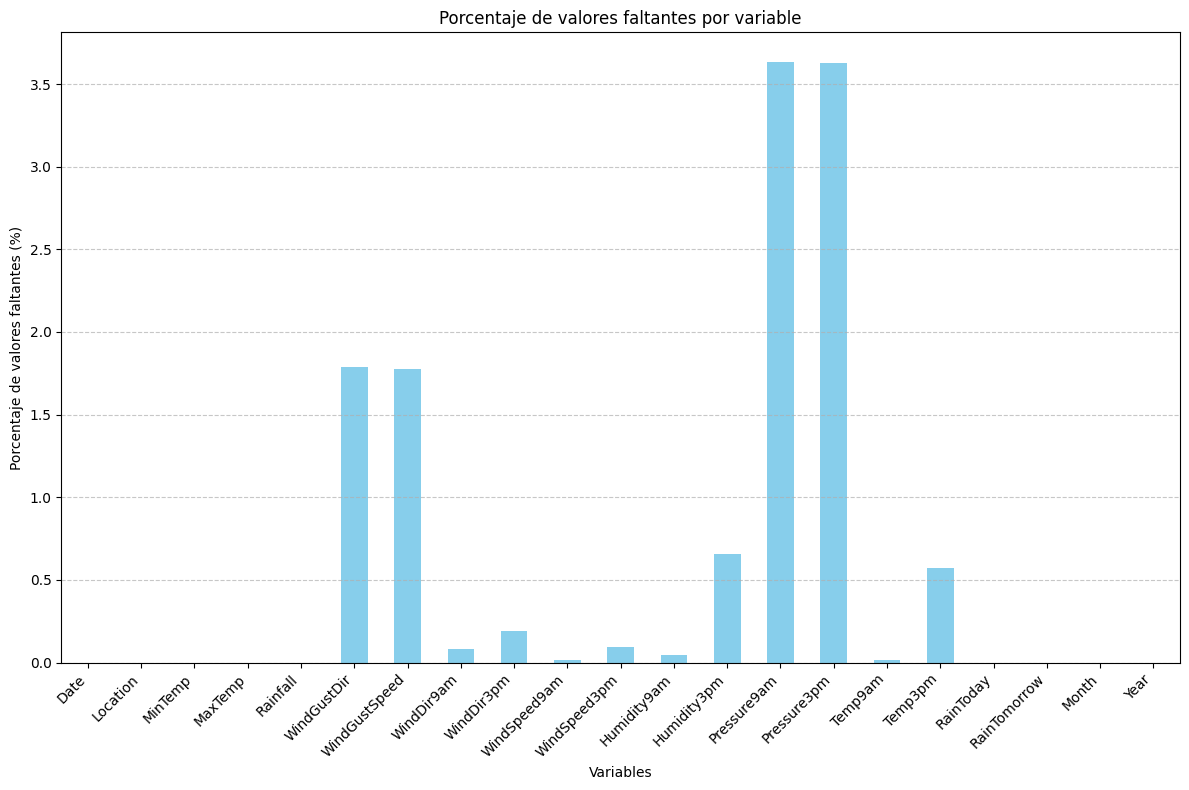

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
WindGustDir      2519
WindGustSpeed    2502
WindDir9am        112
WindDir3pm        267
WindSpeed9am       25
WindSpeed3pm      135
Humidity9am        63
Humidity3pm       925
Pressure9am      5112
Pressure3pm      5108
Temp9am            24
Temp3pm           805
RainToday           0
RainTomorrow        0
Month               0
Year                0
dtype: int64


In [ ]:
# Calcular el porcentaje de valores faltantes por columna
missing_percentage = (data.isnull().sum() / len(data)) * 100

# Crear un gráfico de barras
plt.figure(figsize=(12, 8))
missing_percentage.plot(kind='bar', color='skyblue')
plt.title('Porcentaje de valores faltantes por variable')
plt.xlabel('Variables')
plt.ylabel('Porcentaje de valores faltantes (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

print(data.isnull().sum())


Habiendo minimizado los datos faltantes, ahora podemos avanzar eliminando esos registros del dataframe, para continuar con el modelo.

In [ ]:
# Eliminar registros con valores faltantes
data_cleaned = data.dropna()

# Verificar el tamaño del DataFrame antes y después de eliminar registros
print("Tamaño del DataFrame original:", data.shape)
print("Tamaño del DataFrame después de eliminar registros con valores faltantes:", data_cleaned.shape)

# Eliminar columnas temporales si ya no son necesarias
data_cleaned.drop(columns=['Month', 'Year', 'Season'], inplace=True, errors='ignore')

# Verificar resultados
print(data_cleaned.isnull().sum())

Tamaño del DataFrame original: (140787, 21)
Tamaño del DataFrame después de eliminar registros con valores faltantes: (134612, 21)
Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64


<ipython-input-9-9dc4f4dff41f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned.drop(columns=['Month', 'Year', 'Season'], inplace=True, errors='ignore')


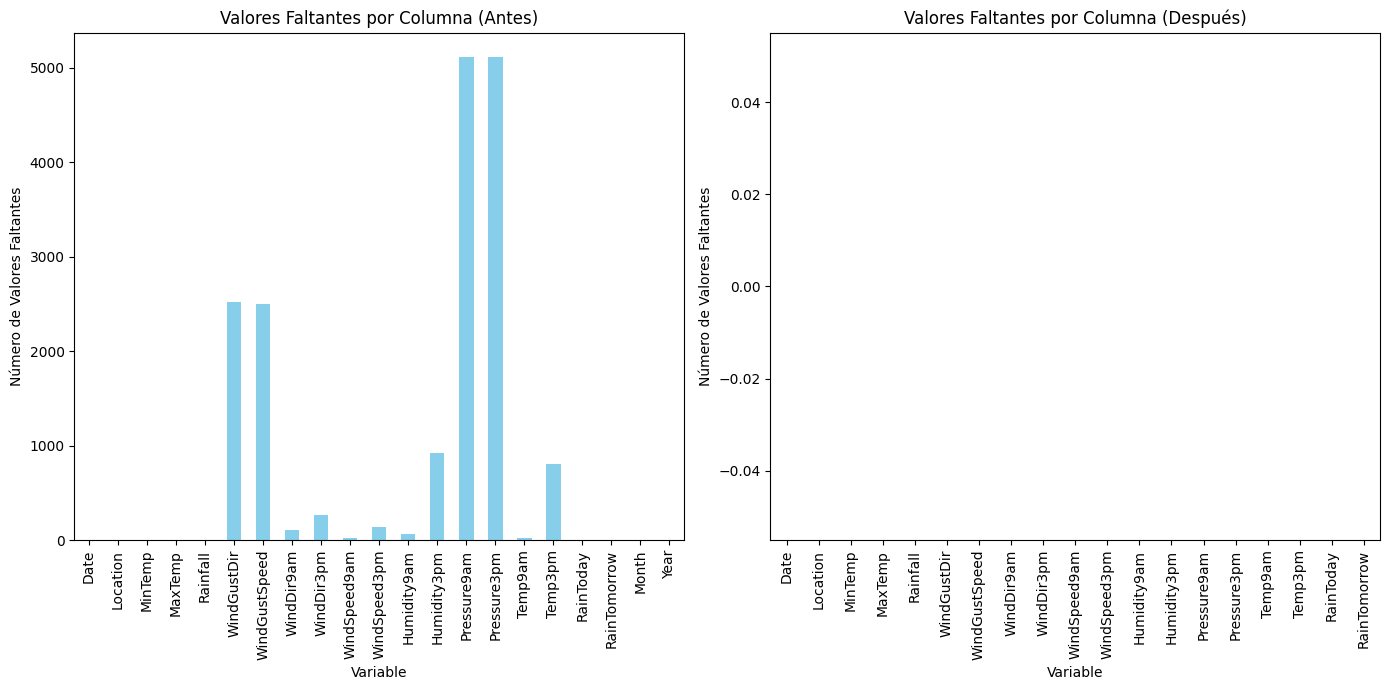

Tamaño del DataFrame original: 140787 filas
Tamaño del DataFrame después de eliminar registros con valores faltantes: 134612 filas
Reducción en el tamaño del DataFrame: 6175 filas


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Antes de eliminar valores faltantes
missing_before = data.isnull().sum()

# Después de eliminar valores faltantes
missing_after = data_cleaned.isnull().sum()

# Visualización de valores faltantes antes y después de eliminar
plt.figure(figsize=(14, 7))

# Gráfico de valores faltantes por columna antes de la limpieza
plt.subplot(1, 2, 1)
missing_before.plot(kind='bar', color='skyblue')
plt.title('Valores Faltantes por Columna (Antes)')
plt.xlabel('Variable')
plt.ylabel('Número de Valores Faltantes')
plt.xticks(rotation=90)

# Gráfico de valores faltantes por columna después de la limpieza
plt.subplot(1, 2, 2)
missing_after.plot(kind='bar', color='lightgreen')
plt.title('Valores Faltantes por Columna (Después)')
plt.xlabel('Variable')
plt.ylabel('Número de Valores Faltantes')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

# Comparación del tamaño del DataFrame
original_size = data.shape[0]
cleaned_size = data_cleaned.shape[0]

# Imprimir el tamaño del DataFrame
print(f"Tamaño del DataFrame original: {original_size} filas")
print(f"Tamaño del DataFrame después de eliminar registros con valores faltantes: {cleaned_size} filas")
print(f"Reducción en el tamaño del DataFrame: {original_size - cleaned_size} filas")

In [ ]:
# Asignar el DataFrame data_cleaned a data
data = data_cleaned

# Verificar que el nombre del DataFrame se ha cambiado
print(data.head())

# Mostrar información general del DataFrame
print(data.info())

        Date Location  MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed  \
0 2008-12-01   Albury     13.4     22.9       0.6           W           44.0   
1 2008-12-02   Albury      7.4     25.1       0.0         WNW           44.0   
2 2008-12-03   Albury     12.9     25.7       0.0         WSW           46.0   
3 2008-12-04   Albury      9.2     28.0       0.0          NE           24.0   
4 2008-12-05   Albury     17.5     32.3       1.0           W           41.0   

  WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
0          W        WNW          20.0          24.0         71.0         22.0   
1        NNW        WSW           4.0          22.0         44.0         25.0   
2          W        WSW          19.0          26.0         38.0         30.0   
3         SE          E          11.0           9.0         45.0         16.0   
4        ENE         NW           7.0          20.0         82.0         33.0   

   Pressure9am  Pressure3pm  Tem

In [ ]:
# Mostrar valores únicos y frecuencia de cada columna categórica
for col in data.select_dtypes(include=['object']).columns:
    print(f"\nColumna: {col}")
    print(data[col].value_counts())


Columna: Location
Location
Canberra            3402
Sydney              3331
Perth               3191
Hobart              3181
Darwin              3148
Brisbane            3132
Bendigo             3030
Townsville          3027
AliceSprings        3025
MountGambier        3022
Adelaide            3020
Launceston          3020
Ballarat            3017
MelbourneAirport    3009
PerthAirport        3008
Mildura             3005
SydneyAirport       3001
Albany              2996
Sale                2992
Albury              2991
Watsonia            2990
Portland            2984
Nuriootpa           2982
Cobar               2980
Cairns              2964
Tuggeranong         2959
WaggaWagga          2958
Woomera             2942
SalmonGums          2941
Dartmoor            2939
NorfolkIsland       2938
CoffsHarbour        2934
Wollongong          2929
GoldCoast           2924
Witchcliffe         2924
Richmond            2903
NorahHead           2888
BadgerysCreek       2877
Walpole             27

Avanzamos en el análisis de los datos, para cada variable en particular

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same 

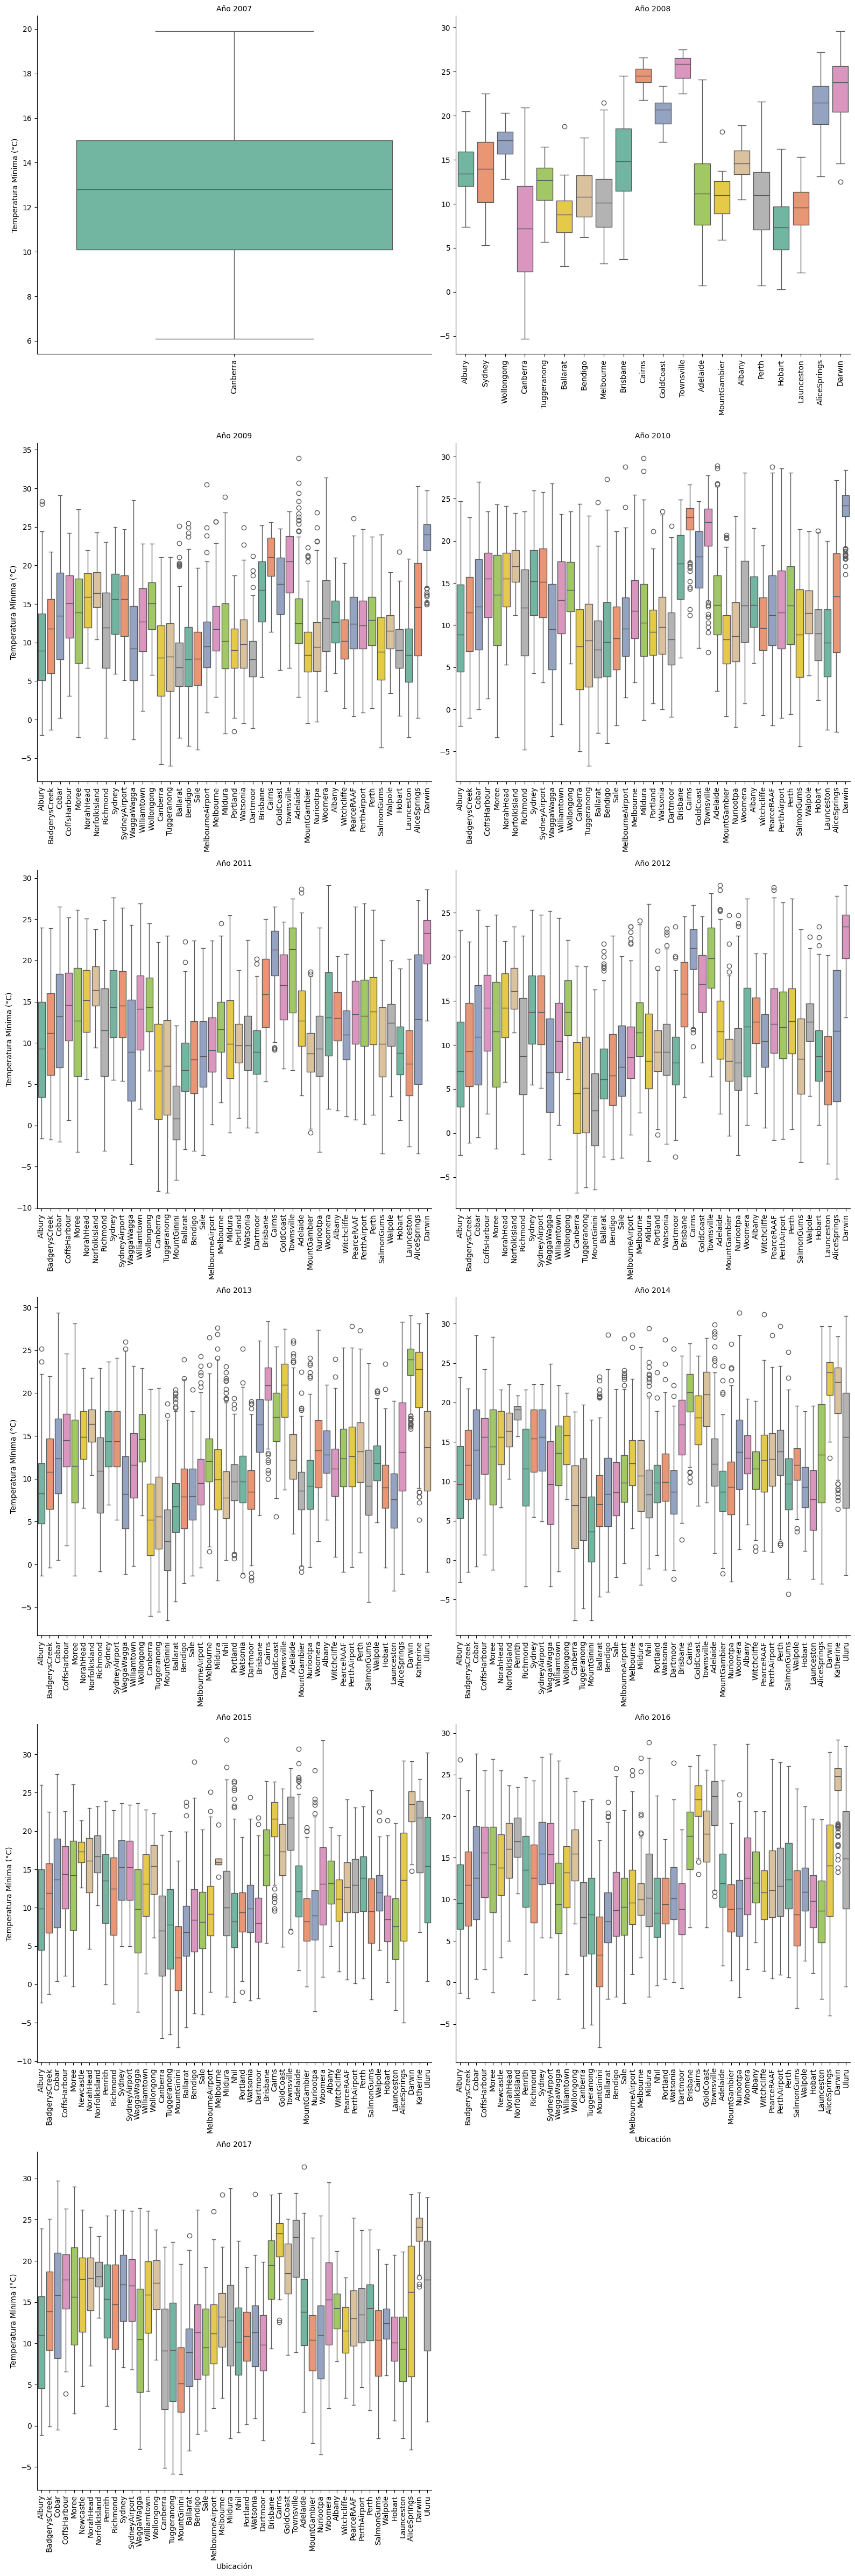

In [ ]:
# Asegúrate de que 'Year' está en el DataFrame y es del tipo correcto
data['Year'] = data['Date'].dt.year

# Crear el gráfico de caja facetado por año
g = sns.FacetGrid(data, col='Year', col_wrap=2, height=8, sharex=False, sharey=False)

# Mapear el gráfico de caja a cada faceta
g.map(sns.boxplot, 'Location', 'MinTemp', palette='Set2')

# Configurar los títulos y etiquetas
g.set_titles(col_template='Año {col_name}')
g.set_axis_labels('Ubicación', 'Temperatura Mínima (°C)')
g.set_xticklabels(rotation=90)

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()

# Mostrar el gráfico
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same 

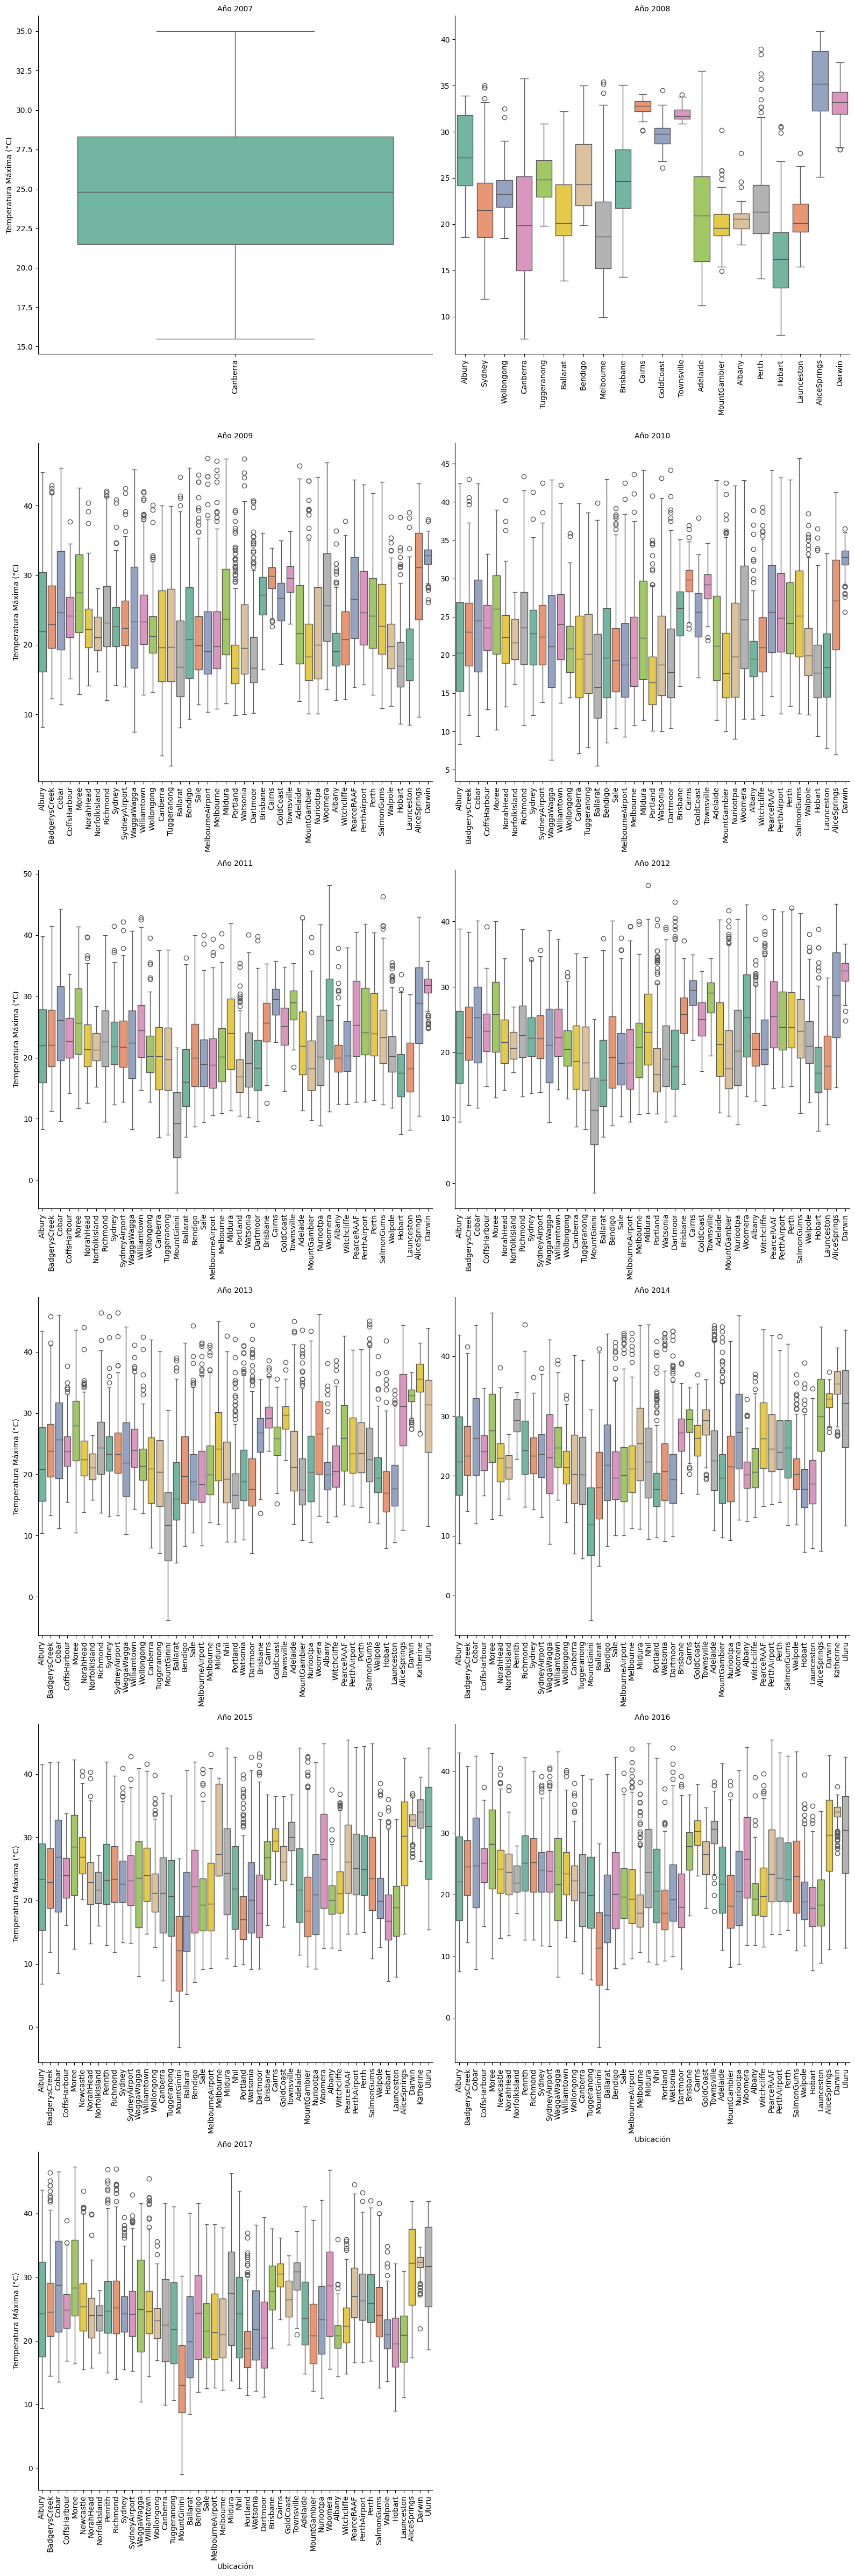

In [ ]:
# Asegúrate de que 'Year' está en el DataFrame y es del tipo correcto
data['Year'] = data['Date'].dt.year

# Crear el gráfico de caja facetado por año
g = sns.FacetGrid(data, col='Year', col_wrap=2, height=8, sharex=False, sharey=False)

# Mapear el gráfico de caja a cada faceta
g.map(sns.boxplot, 'Location', 'MaxTemp', palette='Set2')

# Configurar los títulos y etiquetas
g.set_titles(col_template='Año {col_name}')
g.set_axis_labels('Ubicación', 'Temperatura Máxima (°C)')
g.set_xticklabels(rotation=90)

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Analizando la variable "lluvia"

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remo

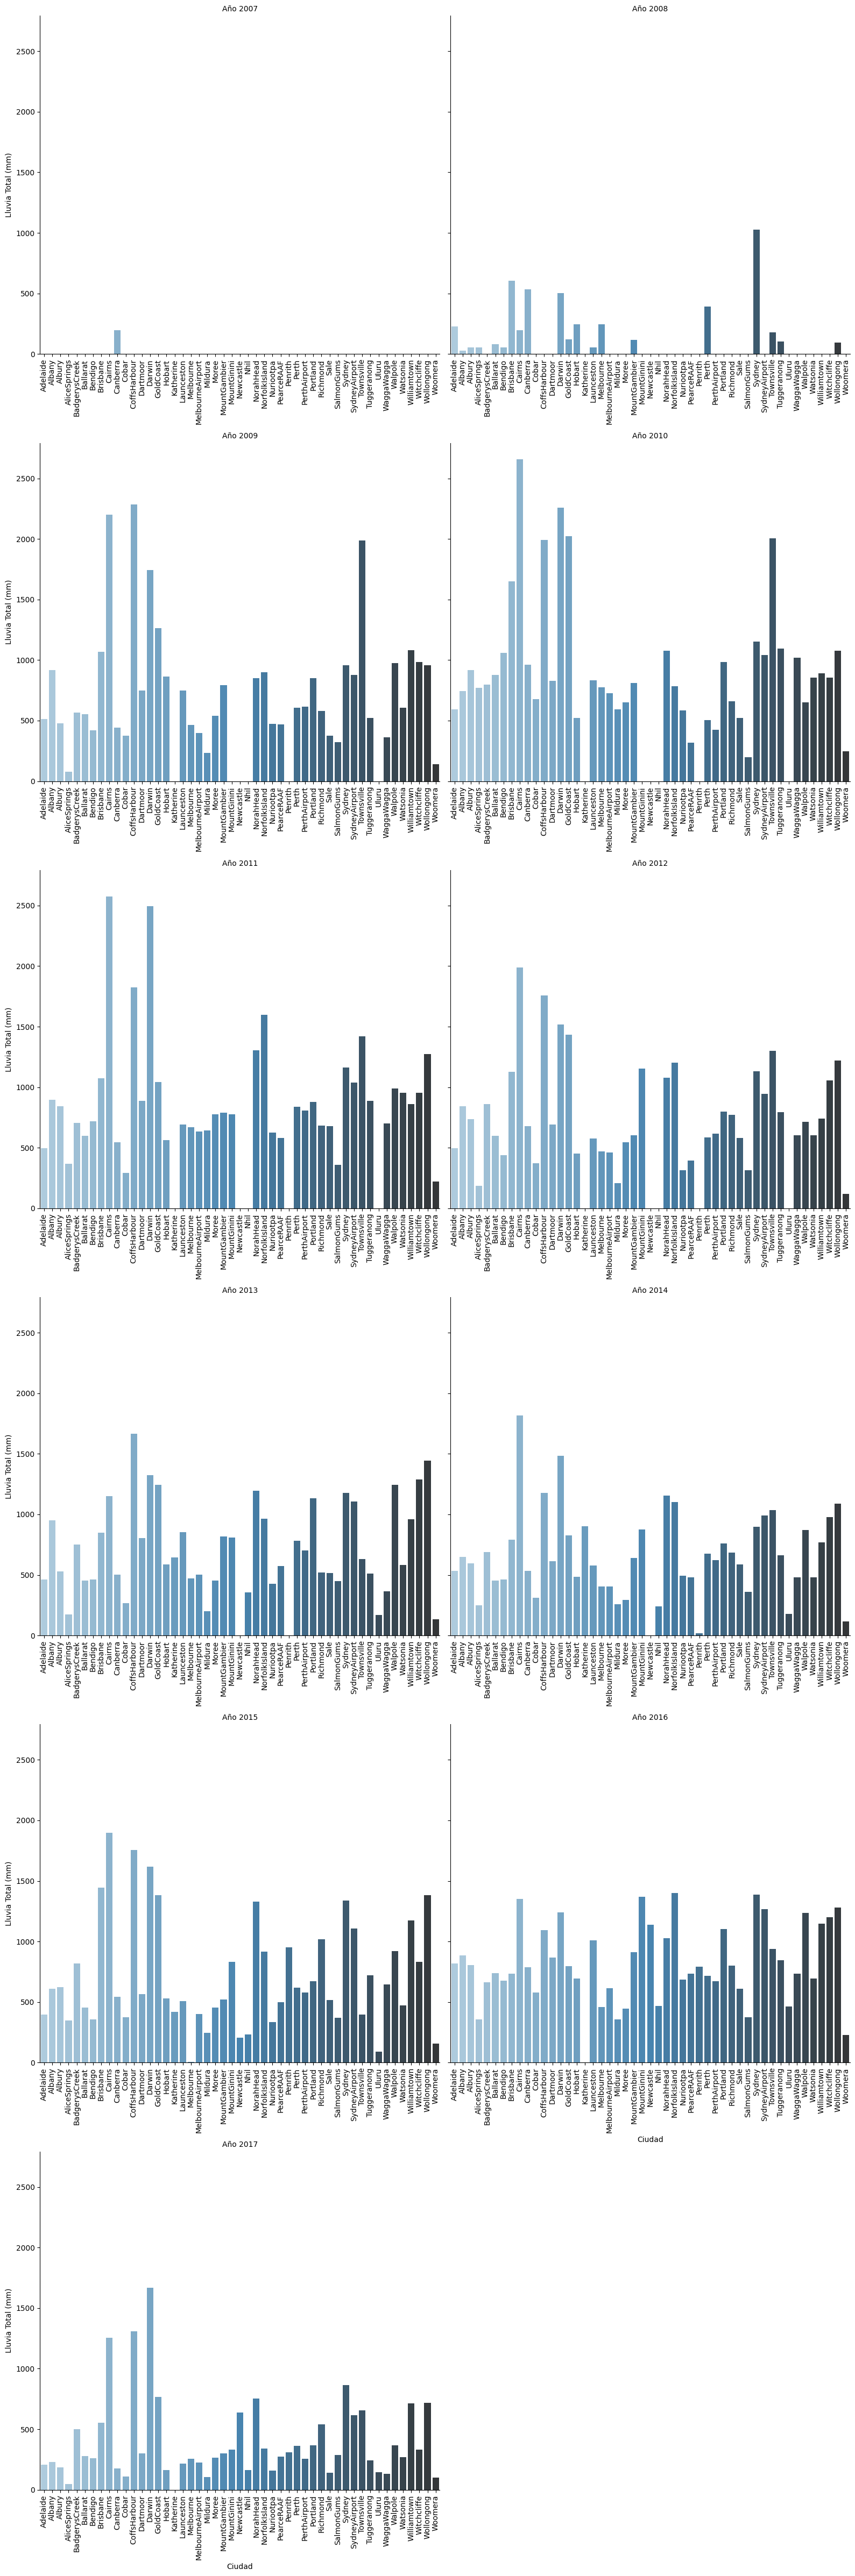

In [ ]:
# Asegurarse de que 'Year' esté en el DataFrame y sea del tipo correcto
data['Year'] = data['Date'].dt.year

# Crear el DataFrame agrupado por ciudad y año
rain_by_city_year = data.groupby(['Location', 'Year'])['Rainfall'].sum().reset_index()

# Crear el gráfico de barras facetado por año
g = sns.FacetGrid(rain_by_city_year, col='Year', col_wrap=2, height=8, sharex=False, sharey=True)
g.map(sns.barplot, 'Location', 'Rainfall', palette='Blues_d', order=rain_by_city_year['Location'].unique())

# Configurar los títulos y etiquetas
g.set_titles(col_template='Año {col_name}')
g.set_axis_labels('Ciudad', 'Lluvia Total (mm)')
g.set_xticklabels(rotation=90)

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Vamos aobservar el comportamiento 80/20 de las cuidades con mayor lluvia, vs las con menor lluvia

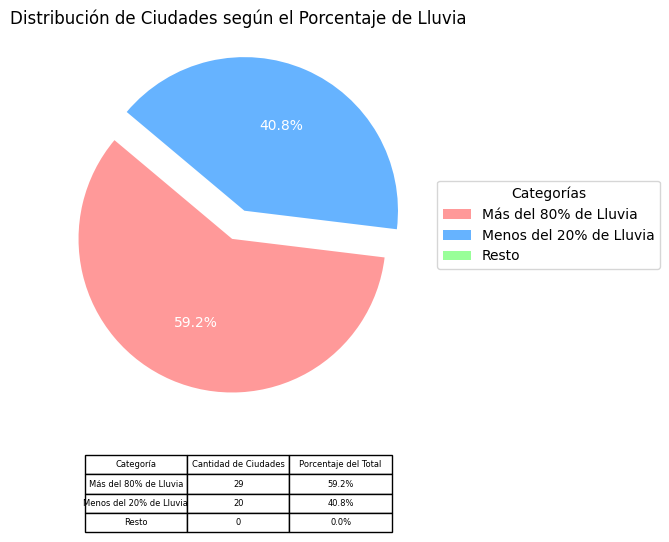

In [ ]:
# Asegurarse de que 'Year' esté en el DataFrame y sea del tipo correcto
data['Year'] = data['Date'].dt.year

# Crear el DataFrame agrupado por ciudad para obtener la cantidad total de lluvia por ciudad
rain_by_city = data.groupby('Location')['Rainfall'].sum().reset_index()

# Calcular el porcentaje de lluvia de cada ciudad en relación con el total de lluvia
total_rainfall = rain_by_city['Rainfall'].sum()
rain_by_city['Rainfall_Percentage'] = (rain_by_city['Rainfall'] / total_rainfall) * 100

# Ordenar el DataFrame por porcentaje de lluvia
rain_by_city = rain_by_city.sort_values(by='Rainfall_Percentage', ascending=False)

# Calcular el porcentaje acumulado
rain_by_city['Cumulative_Percentage'] = rain_by_city['Rainfall_Percentage'].cumsum()

# Contar cuántas ciudades tienen más del 80% de la lluvia acumulada
more_than_80 = len(rain_by_city[rain_by_city['Cumulative_Percentage'] <= 80])

# Contar cuántas ciudades tienen menos del 20% de la lluvia acumulada
less_than_20 = len(rain_by_city[rain_by_city['Cumulative_Percentage'] >= 80])

# Crear el gráfico circular
labels = ['Más del 80% de Lluvia', 'Menos del 20% de Lluvia', 'Resto']
sizes = [more_than_80, less_than_20, len(rain_by_city) - (more_than_80 + less_than_20)]
colors = ['#ff9999', '#66b3ff', '#99ff99']
explode = (0.1, 0.1, 0)  # Solo "explota" la primera y segunda porción

fig, ax = plt.subplots(figsize=(12, 8))

# Crear el gráfico circular
wedges, texts, autotexts = ax.pie(sizes, explode=explode, colors=colors, autopct='%1.1f%%', startangle=140, textprops=dict(color="w"))

# Añadir título
ax.set_title('Distribución de Ciudades según el Porcentaje de Lluvia')

# Añadir leyenda
ax.legend(wedges, labels, title="Categorías", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Añadir la tabla debajo del gráfico
table_data = [
    ['Categoría', 'Cantidad de Ciudades', 'Porcentaje del Total'],
    ['Más del 80% de Lluvia', more_than_80, f'{(more_than_80/len(rain_by_city)*100):.1f}%'],
    ['Menos del 20% de Lluvia', less_than_20, f'{(less_than_20/len(rain_by_city)*100):.1f}%'],
    ['Resto', len(rain_by_city) - (more_than_80 + less_than_20), f'{((len(rain_by_city) - (more_than_80 + less_than_20))/len(rain_by_city)*100):.1f}%']
]

# Dibujar la tabla
table = plt.table(cellText=table_data, colLabels=None, cellLoc='center', loc='bottom', bbox=[0.1, -0.3, 0.8, 0.2])
table.auto_set_font_size(False)
table.set_fontsize(6)

# Ajustar diseño para que no se superponga la tabla y el gráfico
plt.subplots_adjust(left=0.2, bottom=0.4)

plt.show()

Analizando el resto de variables, para ver si encotramos datos interesantes o conclusiones que indiquen o requieran mayuor profundidad.

In [ ]:
# Seleccionar las variables a analizar
variables = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
             'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm']

# Crear una pivot table con estadísticas por ciudad
pivot_table_stats = data.pivot_table(index='Location', values=variables,
                                     aggfunc={'MinTemp': ['mean', 'std', 'min', 'max'],
                                              'MaxTemp': ['mean', 'std', 'min', 'max'],
                                              'Rainfall': ['mean', 'std', 'min', 'max'],
                                              'WindGustSpeed': ['mean', 'std', 'min', 'max'],
                                              'WindSpeed9am': ['mean', 'std', 'min', 'max'],
                                              'WindSpeed3pm': ['mean', 'std', 'min', 'max'],
                                              'Humidity9am': ['mean', 'std', 'min', 'max'],
                                              'Humidity3pm': ['mean', 'std', 'min', 'max'],
                                              'Pressure9am': ['mean', 'std', 'min', 'max'],
                                              'Pressure3pm': ['mean', 'std', 'min', 'max']})

# Mostrar la pivot table
print(pivot_table_stats)

                 Humidity3pm                              Humidity9am  \
                         max       mean    min        std         max   
Location                                                                
Adelaide           97.000000  44.771487   4.00  18.925835       100.0   
Albany             99.000000  61.018100  17.00  16.754879       100.0   
Albury            100.000000  47.870612   7.00  19.827103       100.0   
AliceSprings      100.000000  24.082459   1.00  17.666643       100.0   
BadgerysCreek     100.000000  51.366794   7.00  18.450280       100.0   
Ballarat          100.000000  59.068993   6.00  22.597474       100.0   
Bendigo            99.000000  46.488172   3.00  20.476122       100.0   
Brisbane           98.000000  53.910524   8.00  14.949489        98.0   
Cairns            100.000000  61.658907  14.00  13.675055       100.0   
Canberra           99.000000  45.852084   4.00  18.061979       100.0   
Cobar              99.000000  34.308105   1.00  19.

1. Correlación entre Variables Numéricas

El primer paso es calcular la matriz de correlación para identificar qué variables numéricas están correlacionadas entre sí.


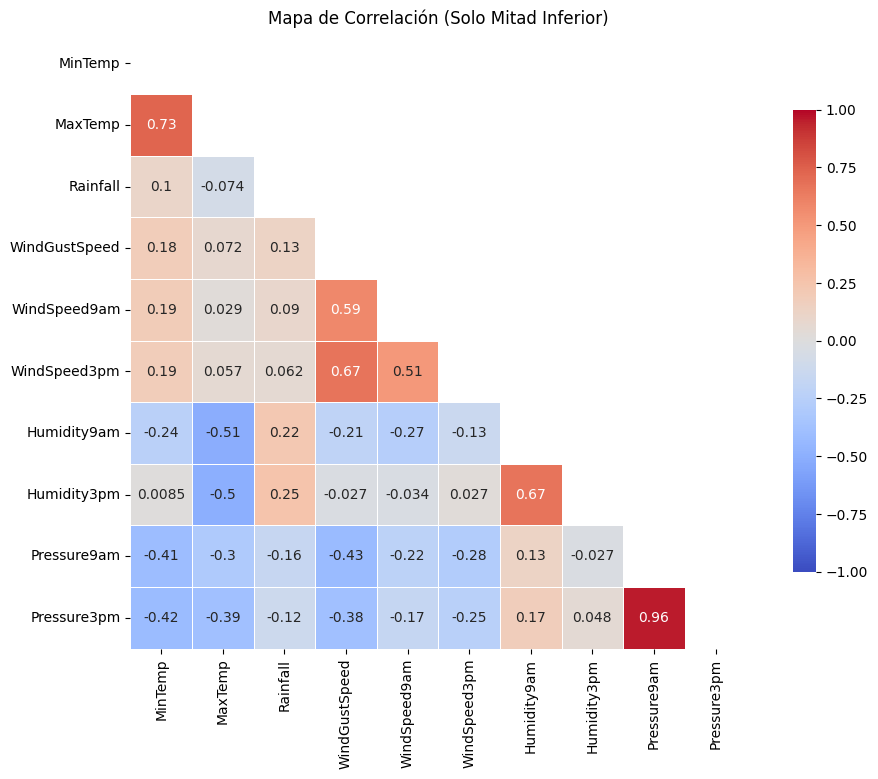

In [ ]:
# Calcular la matriz de correlación
correlation_matrix = data[['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
                           'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm']].corr()

# Generar una máscara para la mitad superior
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Ajustar el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Dibujar el mapa de calor con la máscara y el mapa de colores correcto
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', vmax=1.0, vmin=-1.0, center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.75})

# Título del gráfico
plt.title('Mapa de Correlación (Solo Mitad Inferior)')
plt.show()

Conclusiones preliminares
1.	 Temperaturas mínima y máxima:
* Fuerte correlación positiva (0.73), lo que indica que cuando una es alta, la otra también lo es.
1.	 Presión atmosférica:
* Altísima correlación (0.96) entre la presión a las 9 AM y a las 3 PM, mostrando consistencia a lo largo del día.
1.	 Humedad y temperatura:
* Humedad a las 9 AM y a las 3 PM tiene correlaciones negativas con la temperatura máxima (-0.51 y -0.5, respectivamente), sugiriendo que los días más húmedos tienden a ser más fríos.
1.	 Velocidades del viento:
* Correlación positiva (0.67) entre la velocidad del viento a las 9 AM y a las 3 PM, indicando que los días ventosos por la mañana suelen seguir siendo ventosos por la tarde.
